# Clean data

📚 Đọc dữ liệu (Input) và khai báo thư viện

In [1]:
# Import các thư viện cần thiết
import pandas as pd                # Xử lý dữ liệu bảng
import numpy as np                # Xử lý giá trị thiếu, NaN, toán học
import dateparser                 # Parse ngày tháng từ chuỗi tự nhiên
from datetime import datetime     # Làm việc với thời gian
from collections import Counter   # Đếm lỗi hoặc dữ liệu bất thường
import math                       # Thư viện toán
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data_selflearning\customers-2000000.csv')
df.sample(5)

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
1151331,1151332,aEb1EF3F7aC26ef,Frederick,Friedman,"Young, Austin and Baird",Mezahaven,Venezuela,177.704.5704x575,325-792-0828x7749,downshoward@sparks.com,2020-08-24,http://www.roberts.net/
1076883,1076884,AB8A4cB6C0BeCcE,Debbie,Salinas,"Drake, Cox and Hall",Mcintoshtown,Guyana,001-899-710-8653x773,626.708.1683x674,tommy51@mccarthy.biz,2021-10-06,https://www.caldwell.com/
86031,86032,C1aB6fd3Bc6BeAc,Gene,Newman,Nixon-Sullivan,East Sherry,Libyan Arab Jamahiriya,(187)640-8022x8071,986.167.8174x5116,stephen81@underwood.com,2021-08-29,http://reeves.com/
1060113,1060114,EF3EFE0Be54eA8a,Frederick,Hamilton,"Donovan, Dawson and Obrien",Port Jeremyborough,Bhutan,201-998-1737x8015,001-238-718-1838x98724,peter46@gaines.com,2021-02-15,https://brooks.biz/
1926846,1926847,Bd0e03eCE76904A,Tim,Dougherty,Kramer-Chen,Lucasview,United States Virgin Islands,001-631-218-4639x9442,+1-256-629-1206x4320,kristinafrye@mullins.com,2022-03-10,http://hoffman.com/


In [3]:
# Cần tùy chỉnh tên cột dataframe cho đúng yêu cầu
import re

def clean_column(col):
    col = col.lower()  # chuyển thành chữ thường
    col = col.strip()  # bỏ khoảng trắng đầu/cuối (nếu có)
    col = re.sub(r'\s+', '_', col)  # thay khoảng trắng bằng _
    col = re.sub(r'[^\w_]', '', col)  # loại bỏ ký tự đặc biệt (chỉ giữ chữ, số, _)
    return col

# Áp dụng cho toàn bộ DataFrame
df.columns = [clean_column(col) for col in df.columns]

df.sample(3)

,index,customer_id,first_name,last_name,company,city,country,phone_1,phone_2,email,subscription_date,website
1787373,1787374,75F1bf8bd26e9dA,Stacey,Hopkins,"Trujillo, Johnson and Wade",Wongberg,Lithuania,570.471.0416x4386,744.430.1432x24264,dmercer@dunlap.com,2022-03-01,http://www.glenn-monroe.net/
1397787,1397788,Bd696cc6Cbd301c,Kathleen,Brandt,"Pena, Estrada and Banks",Hodgemouth,Austria,001-129-424-1384x1604,001-884-176-5178,merrittkatie@reed.org,2020-10-25,https://www.levy-spears.com/
1599693,1599694,11c8df9af5FFc96,Amanda,Frost,Henderson Ltd,Dariusland,Turkey,001-402-357-6027,137.906.1225,annette85@carson.org,2022-02-17,http://www.hopkins.com/


In [4]:
# Đếm số dòng, cột
df.shape

(2000000, 12)

In [5]:
# Liệt kê tên các cột trong dataframe
df.columns

Index(['index', 'customer_id', 'first_name', 'last_name', 'company', 'city',
       'country', 'phone_1', 'phone_2', 'email', 'subscription_date',
       'website'],
      dtype='object')

In [6]:
# Thống kê (chỉ dành cho định dạng số)
df.describe()

,index
count,2.000000e+06
mean,1.000000e+06
std,5.773504e+05
min,1.000000e+00
25%,5.000008e+05
50%,1.000000e+06
75%,1.500000e+06
max,2.000000e+06


In [7]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   index              int64 
 1   customer_id        object
 2   first_name         object
 3   last_name          object
 4   company            object
 5   city               object
 6   country            object
 7   phone_1            object
 8   phone_2            object
 9   email              object
 10  subscription_date  object
 11  website            object
dtypes: int64(1), object(11)
memory usage: 183.1+ MB


In [8]:
df.sample(3)

,index,customer_id,first_name,last_name,company,city,country,phone_1,phone_2,email,subscription_date,website
1852736,1852737,2317A9ED9e3b5Ec,Marcia,Bird,Hood-Durham,Yatesfurt,Zambia,(007)941-7930x33396,001-225-330-6993,christymaynard@thomas.biz,2021-06-02,http://www.thornton-tapia.net/
1413070,1413071,E98d9Af2FF1DDF8,Adam,Jones,Dean-Best,Lake Ruben,Saint Lucia,+1-027-733-6407x67634,702.760.5835x2523,thomasbonnie@barr-phelps.com,2021-02-19,https://www.richardson.net/
1053674,1053675,A28fdE99c76d12B,Roger,Warner,Zuniga and Sons,Stantontown,Palestinian Territory,001-635-081-8919,541.854.0693,obarrett@clay.com,2020-07-06,https://wyatt.com/


In [11]:
# Nếu chỉ muốn liệt kê các cột có giá trị rỗng
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [12]:
# Liệt kê columns index

for i, col in enumerate(df.columns):
    print(i, col)

0 index
1 customer_id
2 first_name
3 last_name
4 company
5 city
6 country
7 phone_1
8 phone_2
9 email
10 subscription_date
11 website


In [13]:
# Đếm số dòng trùng lặp hoàn toàn
num_duplicates = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn là: {num_duplicates}")

Số dòng trùng lặp hoàn toàn là: 0


In [14]:
df.shape

(2000000, 12)

✅ Định dạng các cột: cột `'subscription_date'` chuyển về dạng `datetime`

In [15]:
df['subscription_date'] = pd.to_datetime(df['subscription_date'])

In [16]:
# Kiểm tra lại định dạng
print(df['subscription_date'].dtypes)  # đảm bảo kiểu là datetime64[ns]

datetime64[ns]


In [17]:
# Thống kê các lỗi datetime

import pandas as pd

# Danh sách các cột cần kiểm tra
cols_to_check = ['subscription_date']

def count_invalid_datetime(series):
    non_blank = series.dropna().astype(str).str.strip()
    non_blank = non_blank[non_blank != '']
    return (pd.to_datetime(non_blank, errors='coerce').isna()).sum()

# Thống kê lỗi định dạng datetime
invalid_counts = {col: count_invalid_datetime(df[col]) for col in cols_to_check}
invalid_counts

{'subscription_date': 0}

In [18]:
import pandas as pd

# Danh sách các cột cần kiểm tra kiểu int
cols_check_int = ['index']  # Đổi tên theo cột thực tế bạn muốn kiểm tra

def count_invalid_int(series):
    non_blank = series.dropna().astype(str).str.strip()
    non_blank = non_blank[non_blank != '']
    return (pd.to_numeric(non_blank, errors='coerce').dropna().astype(float) % 1 != 0).sum() + \
           pd.to_numeric(non_blank, errors='coerce').isna().sum()

# Đếm số dòng không thể ép kiểu thành int
invalid_counts_int = {col: count_invalid_int(df[col]) for col in cols_check_int}
invalid_counts_int


{'index': 0}

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   index              int64         
 1   customer_id        object        
 2   first_name         object        
 3   last_name          object        
 4   company            object        
 5   city               object        
 6   country            object        
 7   phone_1            object        
 8   phone_2            object        
 9   email              object        
 10  subscription_date  datetime64[ns]
 11  website            object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 183.1+ MB


In [20]:
negative_quantity = df.loc[df['index'] < 0, 'index'].count()
negative_quantity

0

📆 Trích xuất thời gian từ cột `'subscription_date'`

In [21]:
df['month'] = df['subscription_date'].dt.month   # tháng
df['day'] = df['subscription_date'].dt.day       # ngày
df['hour'] = df['subscription_date'].dt.hour     # giờ
df['year_month'] = df['subscription_date'].dt.strftime('%Y-%m')
df['year'] = df['subscription_date'].dt.year     # năm
df['weekday'] = df['subscription_date'].dt.day_name()  # tên thứ: Monday, Tuesday...

In [22]:
df.sample(5)

,index,customer_id,first_name,last_name,company,city,country,phone_1,phone_2,email,subscription_date,website,month,day,hour,year_month,year,weekday
168521,168522,9dBB7C7a65B77Ba,Elaine,Gillespie,"Pennington, Callahan and Donaldson",Port Staceyville,Gibraltar,001-077-602-6920x969,861-225-1779x34214,brady97@irwin.biz,2021-08-10,http://perez-lester.com/,8,10,0,2021-08,2021,Tuesday
236508,236509,A1dfC4Df48a9228,Christina,Callahan,Parker-Banks,Lake Harryfort,Hong Kong,792-639-7930x0175,(821)007-2213x734,victor74@stephenson.org,2021-09-03,http://cuevas.com/,9,3,0,2021-09,2021,Friday
627407,627408,D4A5c2Df0acb7EA,Allen,Cantu,"Rojas, Oneill and Joseph",Clintonstad,Portugal,802.148.8399,266-384-3044x8583,ruthleach@becker-carroll.info,2021-11-23,http://patton.net/,11,23,0,2021-11,2021,Tuesday
233659,233660,82C3553cA7d551f,Spencer,Garner,"Hanson, Byrd and Duran",Pamelaview,Rwanda,848-818-4966,001-678-561-7372x4717,pmatthews@mcdonald.net,2021-01-07,https://www.barrett.info/,1,7,0,2021-01,2021,Thursday
1103420,1103421,Ed92f11d3Bbc1d8,Zoe,Davidson,"Martin, Farrell and Thornton",West Willie,Bangladesh,001-573-774-4554,(058)878-3193,rushkerry@martin.net,2021-08-04,https://www.spence.biz/,8,4,0,2021-08,2021,Wednesday


# EDA

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đếm số lượng khách hàng duy nhất theo quốc gia
df_country = df.groupby('country')['customer_id'].nunique().reset_index()

# Bước 2: Đổi tên cột cho dễ đọc
df_country.columns = ['Quốc gia', 'Số lượng KH']

# Bước 3: Sắp xếp giảm dần theo số lượng khách hàng
df_country = df_country.sort_values(by='Số lượng KH', ascending=False)

# Bước 4: Hiển thị top 10 quốc gia có nhiều khách hàng nhất
print(df_country.head(10))


                       Quốc gia  Số lượng KH
114                       Korea        16240
49                        Congo        16208
110                      Jordan         8428
237                     Vietnam         8388
206                    Suriname         8375
216                 Timor-Leste         8372
242                    Zimbabwe         8360
197  Slovakia (Slovak Republic)         8359
152                 Netherlands         8354
188                       Samoa         8354


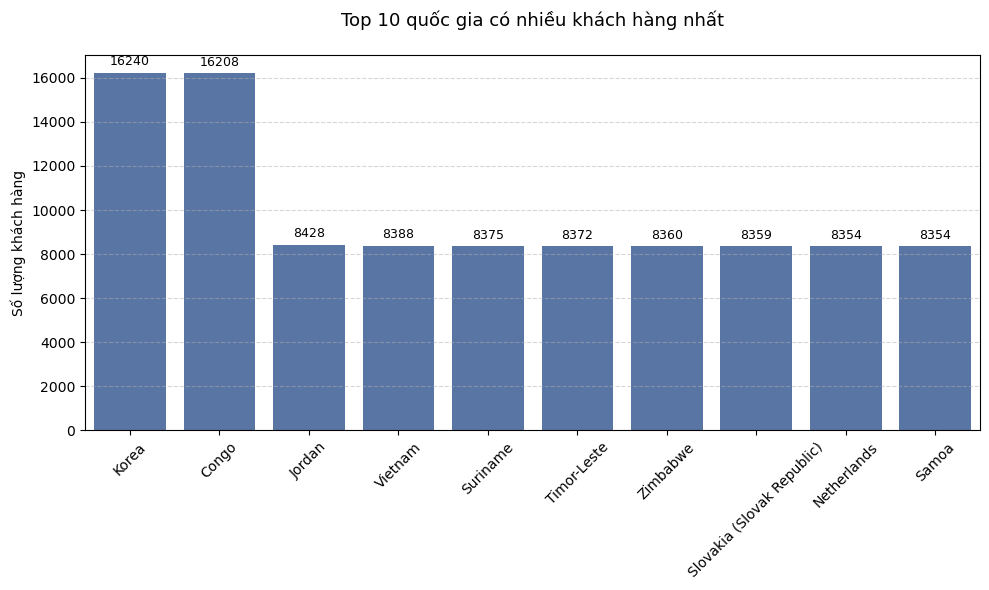

In [24]:
# Lấy top 10 quốc gia
top10 = df_country.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10,
    x='Quốc gia',
    y='Số lượng KH',
    color='#4C72B0'
)
plt.title('Top 10 quốc gia có nhiều khách hàng nhất\n', fontsize=13)
plt.xlabel('')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Thêm nhãn trên cột
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.tight_layout()
plt.show()


In [25]:
# Thống kê theo năm
registrations_by_year = df['year'].value_counts().sort_index()
print("Số lượng đăng ký theo năm:")
print(registrations_by_year)

Số lượng đăng ký theo năm:
year
2020    831045
2021    830392
2022    338563
Name: count, dtype: int64


In [26]:
# Thống kê theo tháng
registrations_by_month = df['year_month'].value_counts().sort_index()
print("Số lượng đăng ký theo tháng:")
print(registrations_by_month)

Số lượng đăng ký theo tháng:
year_month
2020-01    70264
2020-02    65831
2020-03    70477
2020-04    68109
2020-05    70545
2020-06    68144
2020-07    70365
2020-08    70111
2020-09    67861
2020-10    70780
2020-11    68145
2020-12    70413
2021-01    70404
2021-02    64060
2021-03    70751
2021-04    68367
2021-05    70413
2021-06    68302
2021-07    70570
2021-08    70123
2021-09    68886
2021-10    70164
2021-11    68222
2021-12    70130
2022-01    70093
2022-02    63671
2022-03    70249
2022-04    68472
2022-05    66078
Name: count, dtype: int64


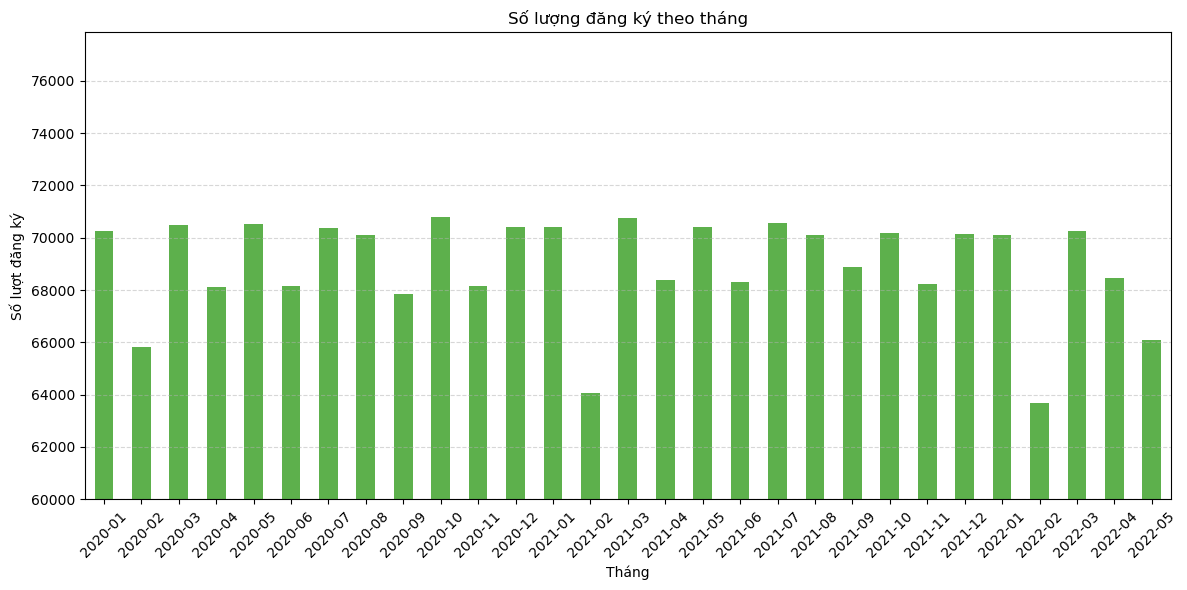

In [27]:
import matplotlib.pyplot as plt

# Vẽ theo tháng
registrations_by_month.plot(kind='bar', figsize=(12, 6), color="#5DB04C")
plt.title('Số lượng đăng ký theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượt đăng ký')
plt.xticks(rotation=45)
plt.ylim(60000, registrations_by_month.max() * 1.1)  # 👉 Giới hạn trục y bắt đầu từ 60000
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [28]:
num_unique_cities = df['city'].nunique()
print(f"Số lượng thành phố khác nhau mà khách hàng đến từ đó là: {num_unique_cities}")

top_cities = df['city'].value_counts().head(15)
print("Top 10 thành phố có nhiều khách hàng nhất:")
print(top_cities)

Số lượng thành phố khác nhau mà khách hàng đến từ đó là: 119928
Top 10 thành phố có nhiều khách hàng nhất:
city
Bradleymouth     163
Leemouth         156
Ashleymouth      155
Kirkmouth        153
Barrymouth       151
Allenmouth       149
Ryanmouth        148
Frankmouth       147
Warrenmouth      146
Leonardmouth     146
Taylormouth      145
Dennismouth      145
Stuartmouth      145
Morganmouth      144
Franklinmouth    144
Name: count, dtype: int64


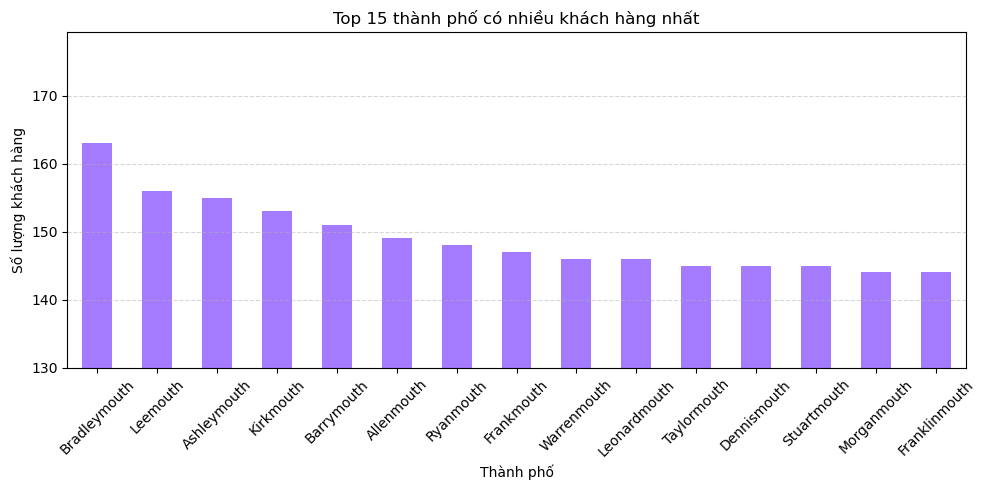

In [29]:
import matplotlib.pyplot as plt

top_cities.plot(kind='bar', figsize=(10, 5), color="#A47AFF")
plt.title('Top 15 thành phố có nhiều khách hàng nhất')
plt.xlabel('Thành phố')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.ylim(130, top_cities.max() * 1.1)  # 👉 Giới hạn trục y bắt đầu từ 60000
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [30]:
df.shape

(2000000, 18)

In [31]:
df.head()

,index,customer_id,first_name,last_name,company,city,country,phone_1,phone_2,email,subscription_date,website,month,day,hour,year_month,year,weekday
0,1,4962fdbE6Bfee6D,Pam,Sparks,Patel-Deleon,Blakemouth,British Indian Ocean Territory (Chagos Archipe...,267-243-9490x035,480-078-0535x889,nicolas00@faulkner-kramer.com,2020-11-29,https://nelson.com/,11,29,0,2020-11,2020,Sunday
1,2,9b12Ae76fdBc9bE,Gina,Rocha,"Acosta, Paul and Barber",East Lynnchester,Costa Rica,027.142.0940,+1-752-593-4777x07171,yfarley@morgan.com,2021-01-03,https://pineda-rogers.biz/,1,3,0,2021-01,2021,Sunday
2,3,39edFd2F60C85BC,Kristie,Greer,Ochoa PLC,West Pamela,Ecuador,+1-049-168-7497x5053,+1-311-216-7855,jennyhayden@petty.org,2021-06-20,https://mckinney.com/,6,20,0,2021-06,2021,Sunday
3,4,Fa42AE6a9aD39cE,Arthur,Fields,Moyer-Wang,East Belinda,Afghanistan,001-653-754-7486x65787,521-630-3858x953,igrimes@ruiz-todd.org,2020-02-13,https://dominguez.biz/,2,13,0,2020-02,2020,Thursday
4,5,F5702Edae925F1D,Michelle,Blevins,Shah and Sons,West Jared,Marshall Islands,8735278329,(633)283-6034x500,diamondcarter@jordan.com,2020-10-20,http://murillo-ryan.com/,10,20,0,2020-10,2020,Tuesday



 Quốc gia: Korea
 Số khách hàng: 16240
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00


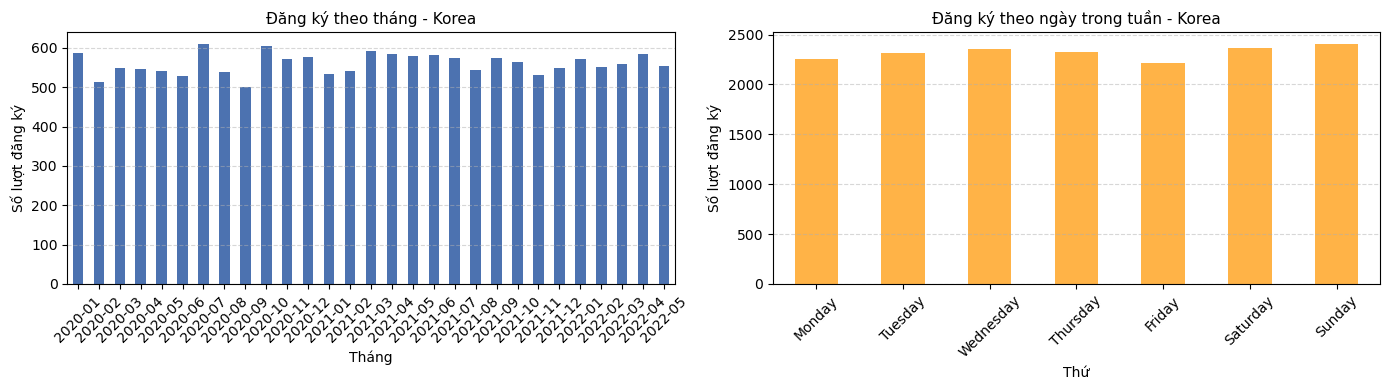


 Quốc gia: Congo
 Số khách hàng: 16208
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-30 00:00:00


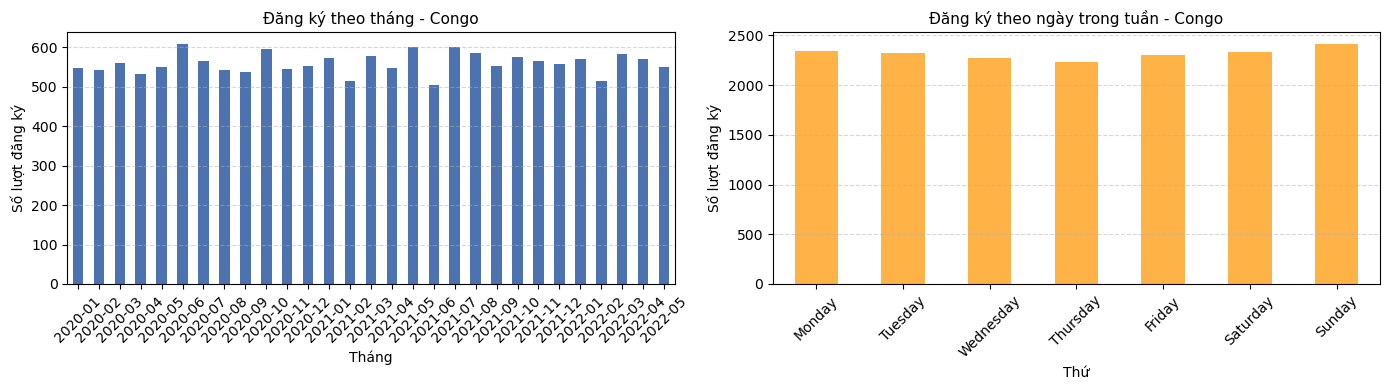


 Quốc gia: Jordan
 Số khách hàng: 8428
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00


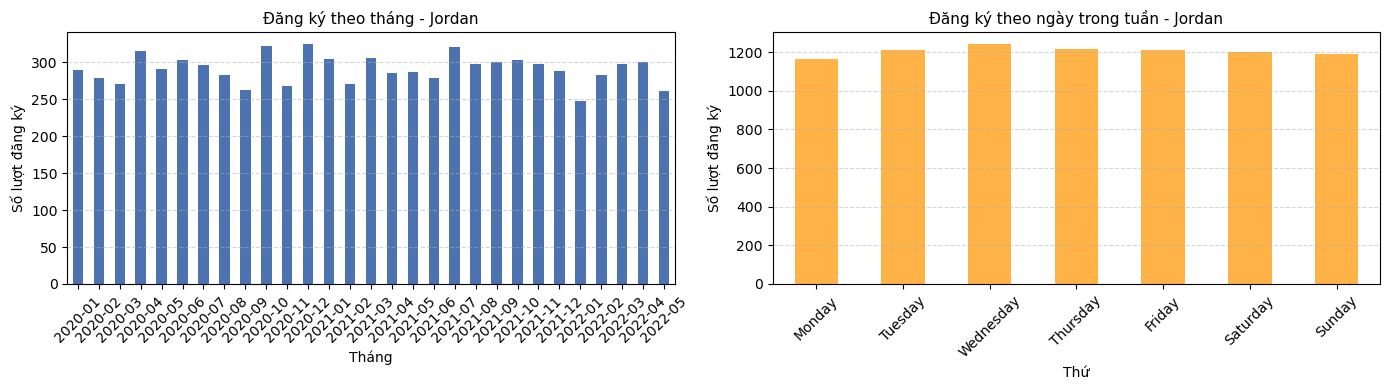


 Quốc gia: Vietnam
 Số khách hàng: 8388
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00


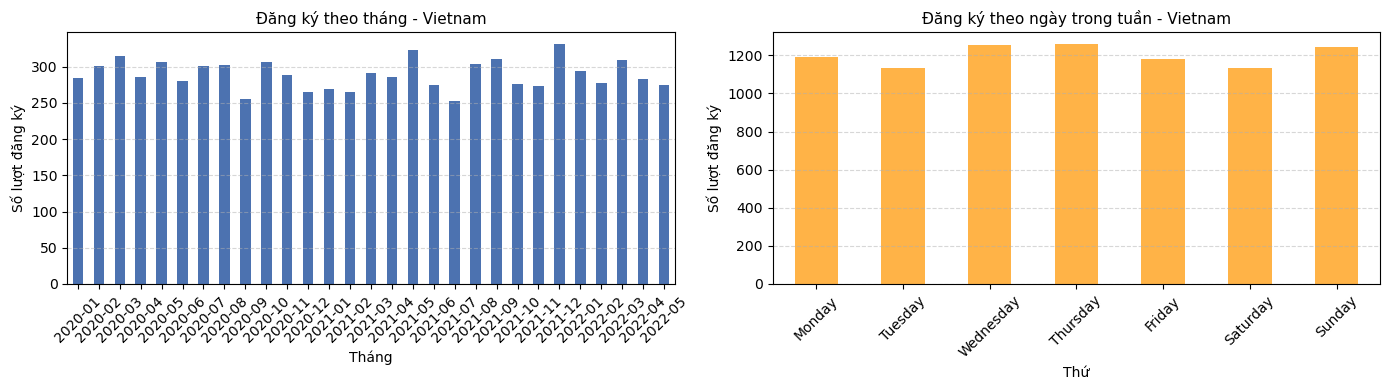


 Quốc gia: Suriname
 Số khách hàng: 8375
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00


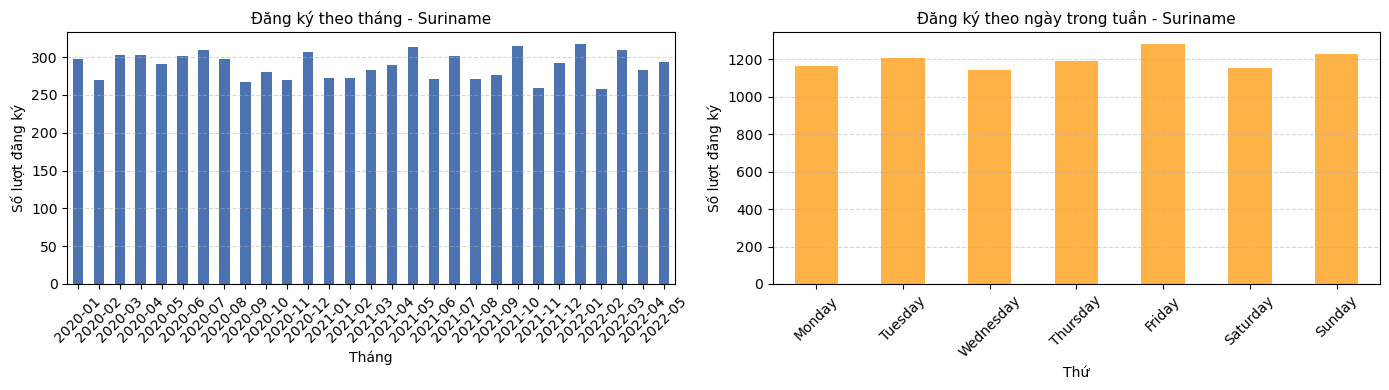

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# B1: Lấy 5 quốc gia có nhiều khách hàng nhất
top_5_countries = df['country'].value_counts().head(5).index.tolist()

# B2: Thiết lập cấu trúc weekday cho đồng bộ
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# B3: Phân tích cho từng quốc gia
for country in top_5_countries:
    df_country = df[df['country'] == country]

    # Thống kê theo tháng
    by_month = df_country['year_month'].value_counts().sort_index()

    # Thống kê theo thứ
    by_weekday = df_country['weekday'].value_counts().reindex(weekday_order)

    # Thống kê tổng quan
    num_cust = df_country['customer_id'].nunique()
    first_date = df_country['subscription_date'].min()
    last_date = df_country['subscription_date'].max()

    # --- Biểu đồ theo tháng ---
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    by_month.plot(kind='bar', color='#4C72B0')
    plt.title(f'Đăng ký theo tháng - {country}', fontsize=11)
    plt.xlabel('Tháng')
    plt.ylabel('Số lượt đăng ký')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # --- Biểu đồ theo thứ ---
    plt.subplot(1, 2, 2)
    by_weekday.plot(kind='bar', color='#FFB347')
    plt.title(f'Đăng ký theo ngày trong tuần - {country}', fontsize=11)
    plt.xlabel('Thứ')
    plt.ylabel('Số lượt đăng ký')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # --- Tổng quan in ra ---
    print(f"\n Quốc gia: {country}")
    print(f" Số khách hàng: {num_cust}")
    print(f" Từ ngày: {first_date} đến {last_date}")
    
    plt.tight_layout()
    plt.show()




 Quốc gia: Korea
 Số khách hàng: 16240
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00

 Quốc gia: Congo
 Số khách hàng: 16208
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-30 00:00:00

 Quốc gia: Jordan
 Số khách hàng: 8428
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00

 Quốc gia: Vietnam
 Số khách hàng: 8388
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00

 Quốc gia: Suriname
 Số khách hàng: 8375
 Từ ngày: 2020-01-01 00:00:00 đến 2022-05-29 00:00:00


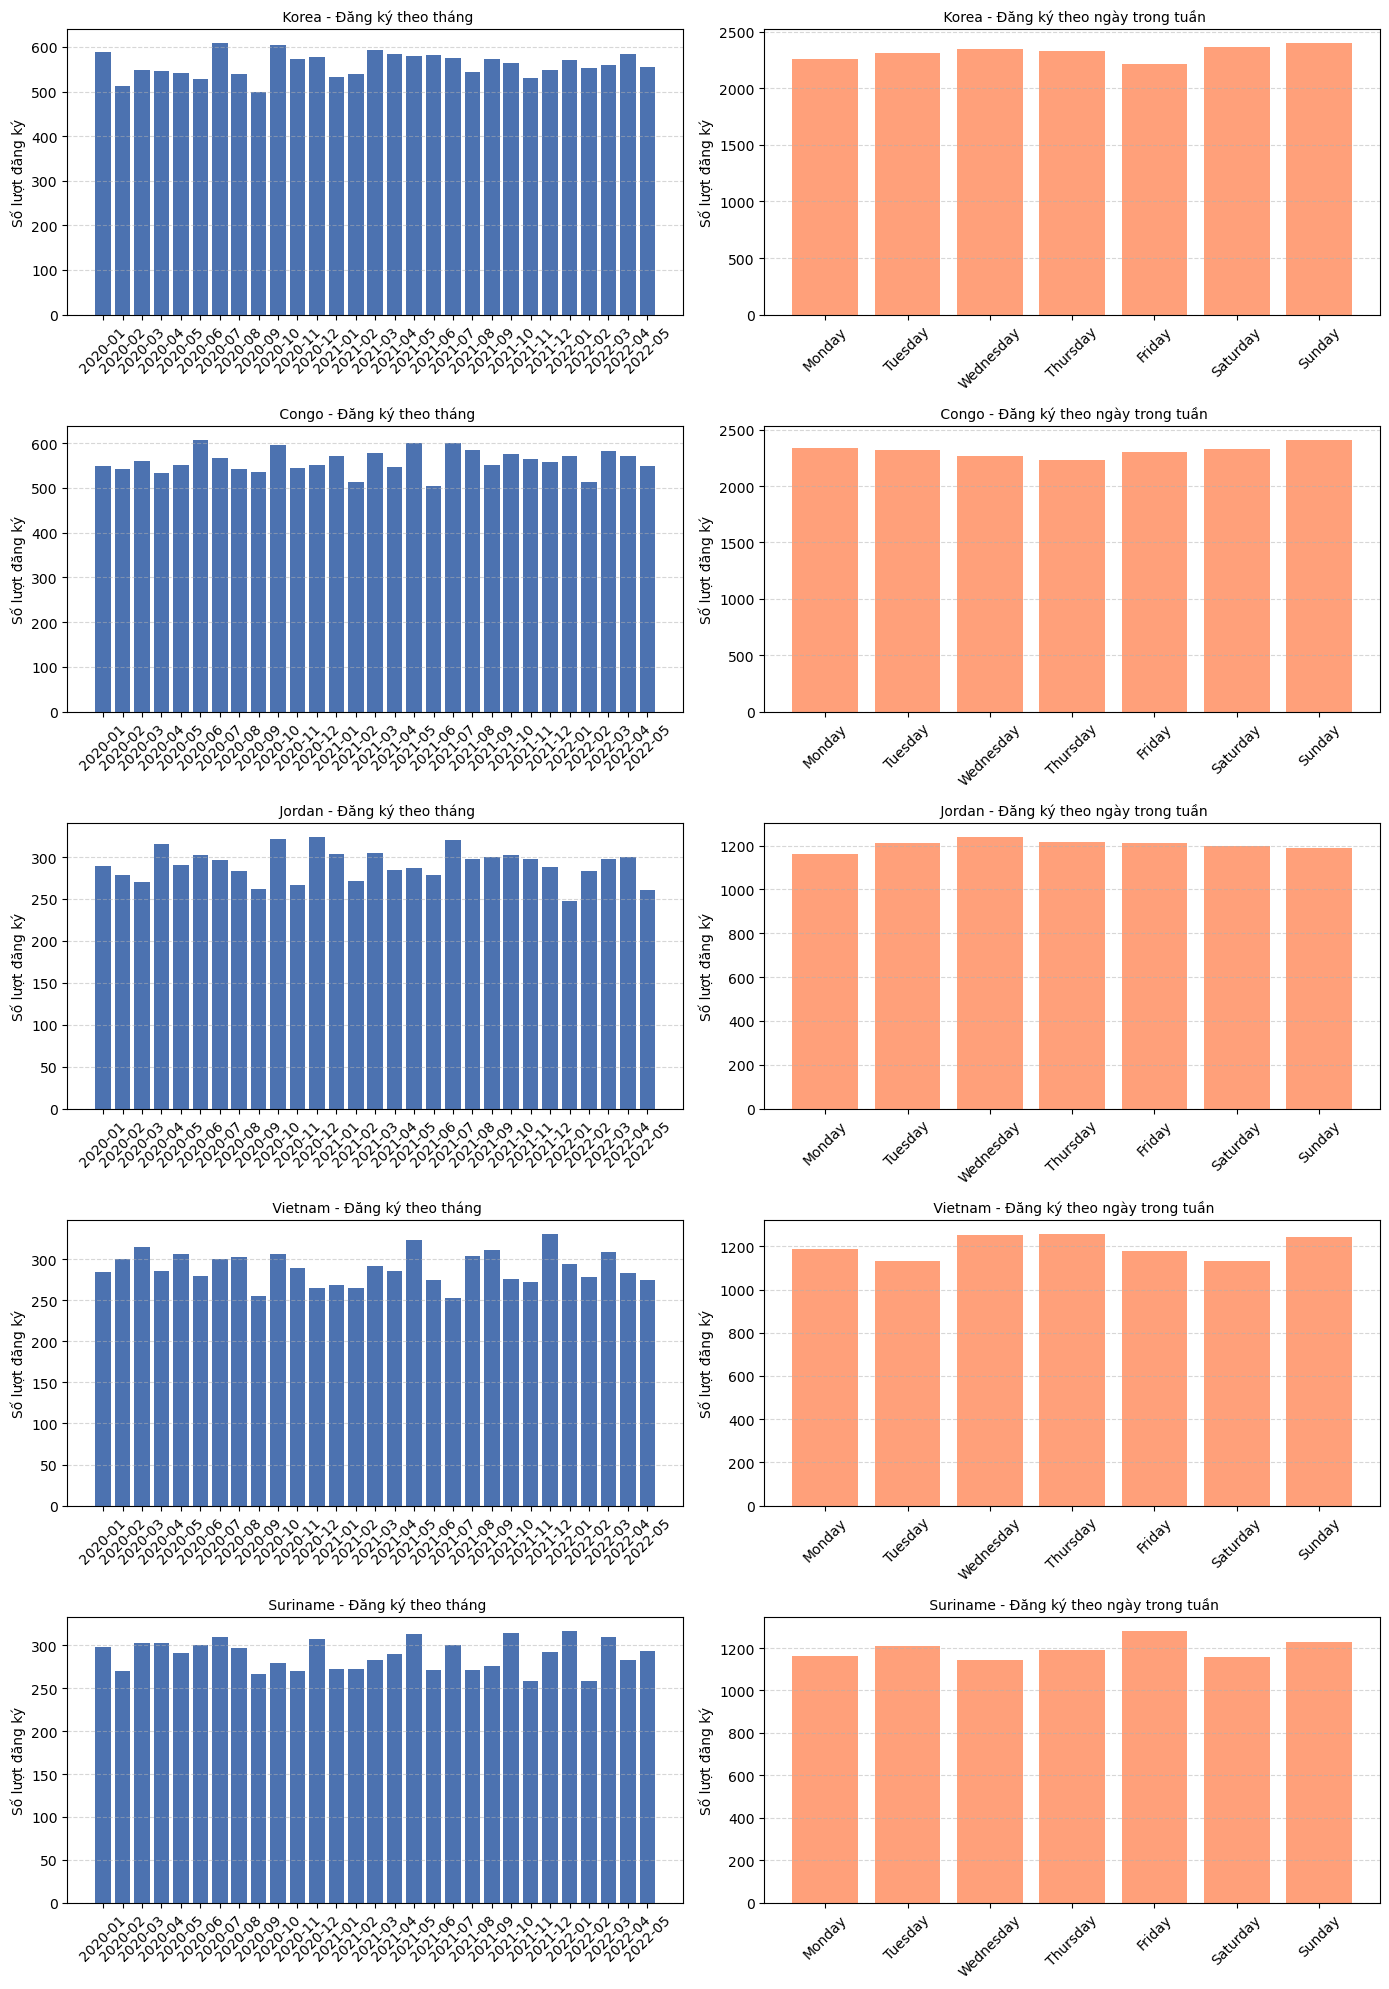

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# B1: Lấy 5 quốc gia có nhiều khách hàng nhất
top_5_countries = df['country'].value_counts().head(5).index.tolist()

# B2: Thiết lập thứ trong tuần để thống nhất thứ tự
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# B3: Tạo figure tổng
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.6)

# B4: Duyệt từng quốc gia và vẽ biểu đồ vào subplot tương ứng
for i, country in enumerate(top_5_countries):
    df_country = df[df['country'] == country]

    # Thống kê theo tháng và thứ
    by_month = df_country['year_month'].value_counts().sort_index()
    by_weekday = df_country['weekday'].value_counts().reindex(weekday_order)

    # Tổng quan
    num_cust = df_country['customer_id'].nunique()
    first_date = df_country['subscription_date'].min()
    last_date = df_country['subscription_date'].max()

    # Subplot bên trái: tháng
    axs[i, 0].bar(by_month.index, by_month.values, color='#4C72B0')
    axs[i, 0].set_title(f' {country} - Đăng ký theo tháng', fontsize=10)
    axs[i, 0].tick_params(axis='x', rotation=45)
    axs[i, 0].set_ylabel('Số lượt đăng ký')
    axs[i, 0].grid(axis='y', linestyle='--', alpha=0.5)

    # Subplot bên phải: weekday
    axs[i, 1].bar(by_weekday.index, by_weekday.values, color='#FFA07A')
    axs[i, 1].set_title(f' {country} - Đăng ký theo ngày trong tuần', fontsize=10)
    axs[i, 1].tick_params(axis='x', rotation=45)
    axs[i, 1].set_ylabel('Số lượt đăng ký')
    axs[i, 1].grid(axis='y', linestyle='--', alpha=0.5)

    # Ghi chú tổng quan
    print(f"\n Quốc gia: {country}")
    print(f" Số khách hàng: {num_cust}")
    print(f" Từ ngày: {first_date} đến {last_date}")

# Hiển thị figure
plt.tight_layout()
plt.show()


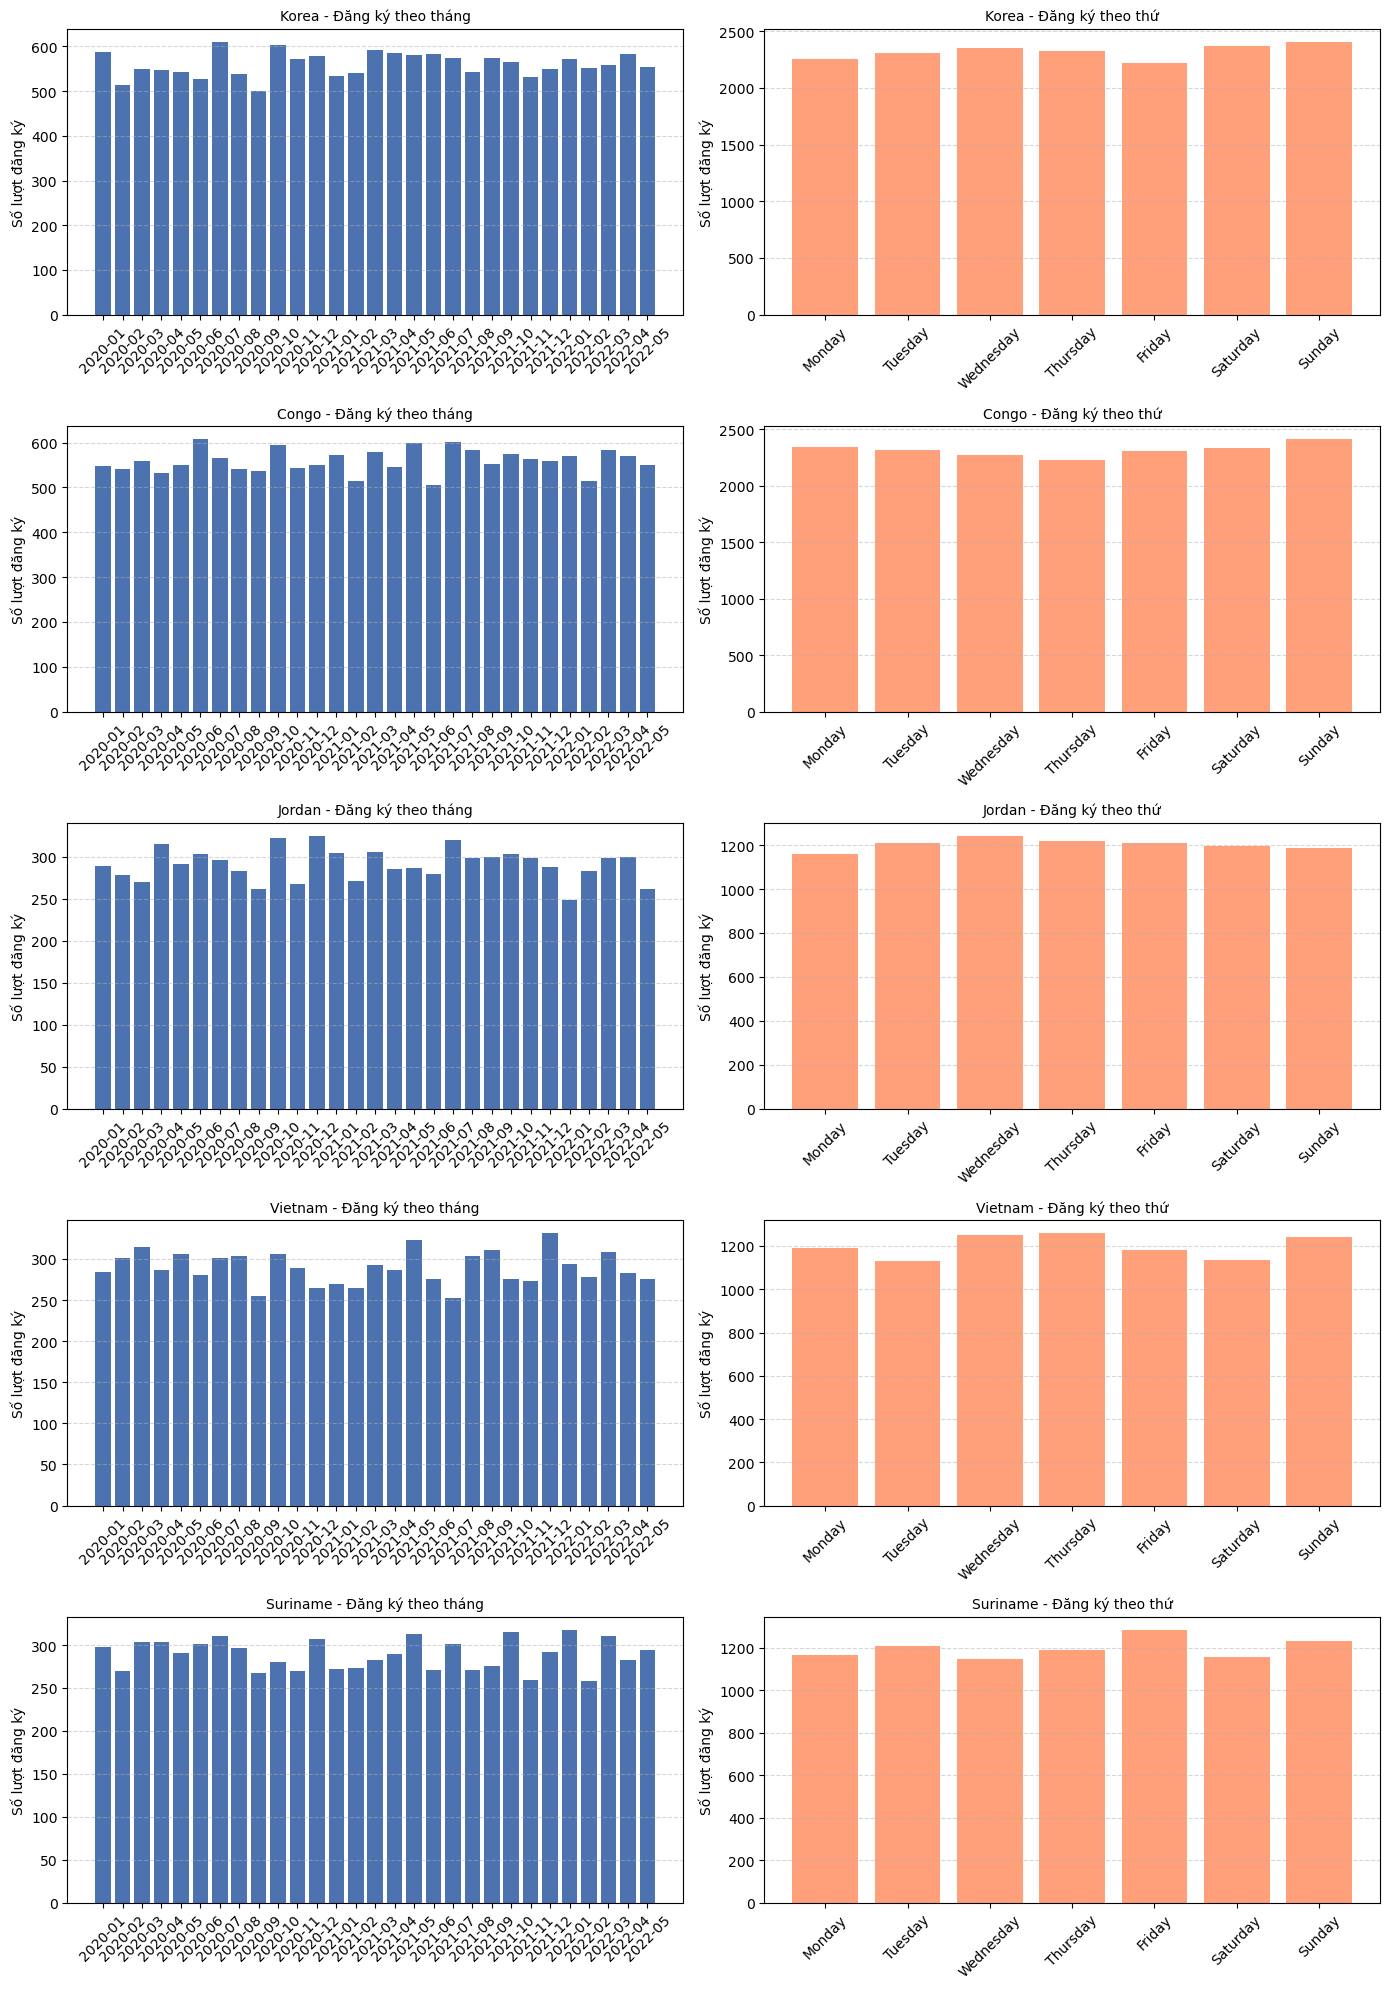

,Quốc gia,Số KH,Từ ngày,Đến ngày
0,Korea,16240,2020-01-01,2022-05-29
1,Congo,16208,2020-01-01,2022-05-30
2,Jordan,8428,2020-01-01,2022-05-29
3,Vietnam,8388,2020-01-01,2022-05-29
4,Suriname,8375,2020-01-01,2022-05-29


In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# B1: Lấy 5 quốc gia có nhiều khách hàng nhất
top_5_countries = df['country'].value_counts().head(5).index.tolist()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# B2: Tạo figure
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.6)

# B3: Tạo danh sách để lưu tổng quan
summary_data = []

# B4: Lặp qua từng quốc gia để vẽ và lưu tổng quan
for i, country in enumerate(top_5_countries):
    df_country = df[df['country'] == country]

    # Thống kê
    by_month = df_country['year_month'].value_counts().sort_index()
    by_weekday = df_country['weekday'].value_counts().reindex(weekday_order)

    num_cust = df_country['customer_id'].nunique()
    first_date = df_country['subscription_date'].min()
    last_date = df_country['subscription_date'].max()

    # Lưu dữ liệu tổng quan
    summary_data.append({
        'Quốc gia': country,
        'Số KH': num_cust,
        'Từ ngày': first_date,
        'Đến ngày': last_date
    })

    # Vẽ biểu đồ tháng
    axs[i, 0].bar(by_month.index, by_month.values, color='#4C72B0')
    axs[i, 0].set_title(f'{country} - Đăng ký theo tháng', fontsize=10)
    axs[i, 0].tick_params(axis='x', rotation=45)
    axs[i, 0].set_ylabel('Số lượt đăng ký')
    axs[i, 0].grid(axis='y', linestyle='--', alpha=0.5)

    # Vẽ biểu đồ thứ
    axs[i, 1].bar(by_weekday.index, by_weekday.values, color='#FFA07A')
    axs[i, 1].set_title(f'{country} - Đăng ký theo thứ', fontsize=10)
    axs[i, 1].tick_params(axis='x', rotation=45)
    axs[i, 1].set_ylabel('Số lượt đăng ký')
    axs[i, 1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# B5: Hiển thị bảng tổng quan
summary_df = pd.DataFrame(summary_data)
summary_df
